## Brain Tumor Prediction Using **Mobilenet**

In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#data sugmentation
# Preprocessing the Training set
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.22)
training_set = datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset',
                                            target_size=(224,224),
                                            color_mode="rgb",
                                            subset="training",
                                            class_mode="binary",
                                            batch_size=32,
                                            shuffle=True)

Found 198 images belonging to 2 classes.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
valid_generator=datagen.flow_from_directory( directory="/content/drive/MyDrive/brain_tumor_dataset",
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                class_mode="binary",
                                                batch_size=32,
                                                shuffle=True)

Found 55 images belonging to 2 classes.


In [6]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

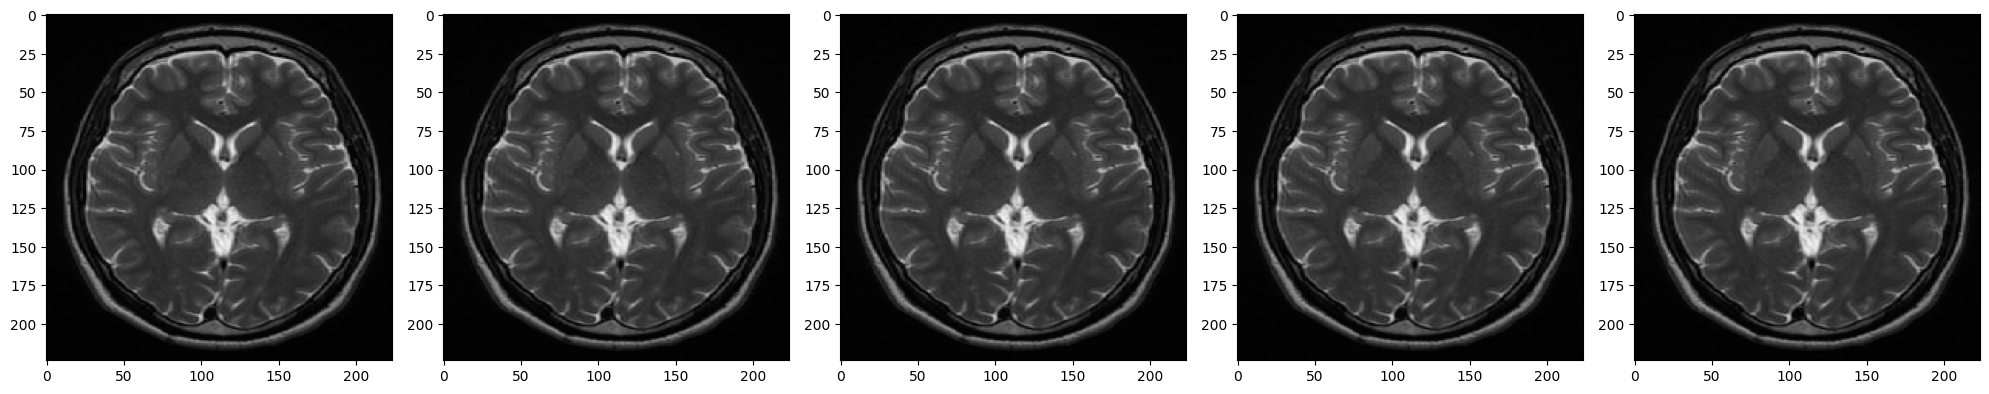

In [7]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [8]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [9]:
import tensorflow_hub as hub

In [10]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input keep smae

In [11]:
# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [12]:
mobile_net.trainable = False

In [13]:
model = tf.keras.models.Sequential([
    mobile_net,
    ### ann layer
    tf.keras.layers.Dense(1, activation='sigmoid') #[0, 1] or [1, 0]
    ])

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(
    training_set,
    epochs=10,
    validation_data=valid_generator
    )

Epoch 1/10
7/7 [==============================] - 33s 4s/step - loss: 0.6343 - accuracy: 0.6010 - val_loss: 0.6705 - val_accuracy: 0.6545
Epoch 2/10
7/7 [==============================] - 1s 208ms/step - loss: 0.5390 - accuracy: 0.7273 - val_loss: 0.5517 - val_accuracy: 0.7091
Epoch 3/10
7/7 [==============================] - 2s 250ms/step - loss: 0.4774 - accuracy: 0.8081 - val_loss: 0.4922 - val_accuracy: 0.7091
Epoch 4/10
7/7 [==============================] - 2s 240ms/step - loss: 0.4291 - accuracy: 0.8687 - val_loss: 0.4560 - val_accuracy: 0.7273
Epoch 5/10
7/7 [==============================] - 1s 214ms/step - loss: 0.3876 - accuracy: 0.8737 - val_loss: 0.4235 - val_accuracy: 0.7636
Epoch 6/10
7/7 [==============================] - 1s 196ms/step - loss: 0.3598 - accuracy: 0.8889 - val_loss: 0.3989 - val_accuracy: 0.8182
Epoch 7/10
7/7 [==============================] - 1s 209ms/step - loss: 0.3356 - accuracy: 0.8889 - val_loss: 0.3802 - val_accuracy: 0.8364
Epoch 8/10
7/7 [======

In [17]:
# Part 4 - Making a single prediction test
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/brain_tumor_dataset/yes/Y1.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

1/1 [==============================] - 1s 1s/step


array([[0.7353013]], dtype=float32)

In [18]:
if result[0]<=0.5:
    print("No BrainTumor")
else:
    print("BrainTumor")

BrainTumor


In [19]:
#save model
from tensorflow.keras.models import load_model
model.save('brain_tumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
